In [152]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [153]:
data=pd.read_csv(r'C:\Users\hari1\Desktop\Data Analytics\data.csv',header=None)
df=pd.DataFrame(data)


In [154]:
#checking for missing values
df.isnull().sum()
#dorping null value rows if any
df=df.dropna()

In [155]:
#split dataset into dependent and independent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [156]:
#split dataset into train_data and test_data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

In [157]:
classifier = LogisticRegression()
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,8,10,20,50],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'tol':[0.0001], 'fit_intercept':[True], 'intercept_scaling':[1], 'max_iter':[25,50,100], 'multi_class':['ovr','multinomial']}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [158]:
classifier_regressor.fit(x_train,y_train)

c:\Users\hari1\Desktop\Data Analytics\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hari1\Desktop\Data Analytics\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hari1\Desktop\Data Analytics\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hari1\Desktop\Data Analytics\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hari1\Desktop\Data Analytics\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hari1\Desktop\Data Anal

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 50],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [25, 50, 100],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.0001]},
             scoring='accuracy')

In [159]:
print(classifier_regressor.best_params_)
print(classifier_regressor.best_score_)

{'C': 20, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
0.5428571428571428


In [160]:
y_pred=classifier_regressor.predict(x_test)
print(y_pred)
print(list(y_test))

[3 2 1 2 2 1 1 1 3 2 2 2 1 1 1 3 2 2 2 3 1 1 1 1 1 2 3 1 1 3 3 1 3 3 1 3 2
 3 2 1 3 1 1 1 2 1]
[1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 2, 1, 3, 3, 3, 1, 3, 3, 2, 3, 2, 1, 2, 1, 2, 1]


In [161]:
score=accuracy_score(y_pred,y_test)
print(score)

0.5217391304347826


In [164]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.79      0.52      0.63        21
           2       0.41      0.54      0.47        13
           3       0.40      0.50      0.44        12

    accuracy                           0.52        46
   macro avg       0.53      0.52      0.51        46
weighted avg       0.58      0.52      0.53        46



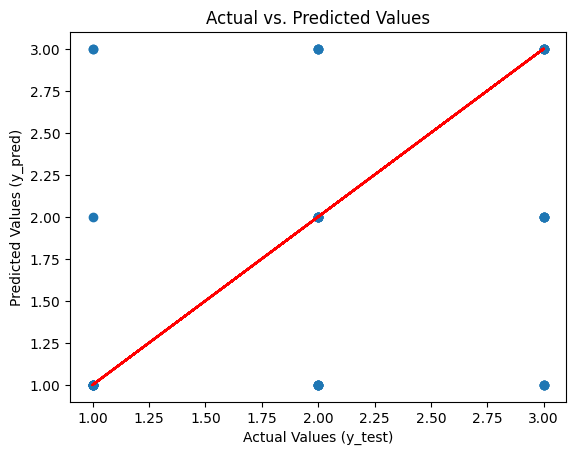

In [162]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()